In [1]:
# !pip install PyMySQL[rsa]
# !pip install cryptography

In [2]:
import pandas as pd
import numpy as np

In [3]:
# STK_CD : 종목코드 STK_NM : 종목명 EX_CD	:거래소코드 NAT_CD : 국가코드, SEC_NM : 섹션명 STK_TP_NM : 주식유형
basecode = pd.read_csv('./data/stock.csv', sep = ',', encoding = 'euc-kr')

In [4]:
basecode.head()

,STK_CD,STK_NM,EX_CD,NAT_CD,SEC_NM,STK_TP_NM
0,000020,동화약품,KP,KR,제약바이오,NaN
1,000040,KR모터스,KP,KR,자동차,NaN
2,000050,경방,KP,KR,섬유의류,NaN
3,000060,메리츠화재,KP,KR,보험,NaN
4,000070,삼양홀딩스,KP,KR,음식료,NaN


In [5]:
basecode_dv = pd.read_csv('./data/basecode_dv.csv', sep = ',', encoding = 'euc-kr')

In [6]:
basecode_dv.head()

,BAS_CD_DV,BAS_CD_DV_NM
0,EX_CD,거래소코드
1,NAT_CD,국가코드


In [7]:
finance_y = pd.read_csv('./data/finance_y.csv', sep = ',', encoding = 'euc-kr')

In [8]:
finance_y.head()

,YY,STK_CD,FIN_ITM_NM,FIN_ITM_VAL,DAT_SOU
0,2015,40,당기순이익,-1.659645e+10,포괄손익계산서_연결_사업보고서_2015-12-31
1,2015,40,매출액,8.065856e+10,포괄손익계산서_연결_사업보고서_2015-12-31
2,2015,40,영업이익,-1.605565e+10,포괄손익계산서_연결_사업보고서_2015-12-31
3,2015,40,주당순이익,-1.020000e+02,포괄손익계산서_연결_사업보고서_2015-12-31
4,2015,50,당기순이익,1.669216e+10,포괄손익계산서_연결_사업보고서_2015-12-31


In [9]:
history_dt = pd.read_csv('./data/history_dt.csv', sep = ',', header = None, encoding = 'euc-kr')

c:\programdata\anaconda3\envs\python_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# 종목코드 일자 시작가 고가 저가 종가 거래량 등락률 3일이동평균 5인이동평균 10일이동평균 20일이동평균 60일이동평균 3일거래평균 5일거래평균 10일거래평균 20일거래평균 60일거래평균 종목별일자순번
hist_col = ['STK_CD', 'DT', 'O_PRC', 'H_PRC', 'L_PRC', 'C_PRC', 'VOL', 'CHG_RT', 'M3_PRC', 'M5_PRC', 'M10_PRC', 'M20_PRC', 'M60_PRC', 'M3_VOL', 'M5_VOL', 'M10_VOL', 'M20_VOL', 'M60_VOL', 'STK_DT_NO']

In [11]:
#hist_col = ['종목코드','일자','시작가','고가','저가','종가','거래량','등락률', '3일이동평균','5일이동평균','10일이동평균','20일이동평균','60일이동평균','3일거래평균','5일거래평균','10일거래평균','20일거래평균','60일거래평균','종목별일자순번']

In [12]:
history_dt.columns = hist_col

In [13]:
history_dt.head()

,STK_CD,DT,O_PRC,H_PRC,L_PRC,C_PRC,VOL,CHG_RT,M3_PRC,M5_PRC,M10_PRC,M20_PRC,M60_PRC,M3_VOL,M5_VOL,M10_VOL,M20_VOL,M60_VOL,STK_DT_NO
0,000020,2019-01-02,9190.0,9430.0,9080.0,9340.0,88403.0,2.64,9160.000,9008.0,9105.0,9297.0,9367.167,59866.667,128073.4,122116.6,99248.55,113536.300,1
1,000020,2019-01-03,9340.0,9390.0,9130.0,9170.0,54992.0,-1.82,9203.333,9076.0,9072.0,9287.0,9343.333,56469.333,111930.0,114459.9,98581.35,112559.183,2
2,000020,2019-01-04,9100.0,9700.0,9100.0,9530.0,115336.0,3.93,9346.667,9236.0,9090.0,9293.5,9333.833,86243.667,69985.6,111760.0,102916.05,111677.633,3
3,000020,2019-01-07,9660.0,9800.0,9510.0,9530.0,107912.0,0.00,9410.000,9334.0,9125.0,9299.0,9327.667,92746.667,78531.2,116599.7,107220.10,110412.583,4
4,000020,2019-01-08,9610.0,9640.0,9320.0,9520.0,108681.0,-0.10,9526.667,9418.0,9182.0,9303.5,9332.167,110643.000,95064.8,108846.4,107019.05,109191.783,5


In [14]:
history_ym = pd.read_csv('./data/history_ym.csv', sep = ',', encoding = 'euc-kr')

In [15]:
history_ym.head()

,STK_CD,YM,O_PRC,H_PRC,L_PRC,C_PRC,VOL
0,000020,201001,7540.0,7820.0,5800.0,5800.0,3996406.0
1,000020,201002,5790.0,6260.0,5700.0,5980.0,2618695.0
2,000020,201003,5990.0,6470.0,5960.0,6000.0,2615552.0
3,000020,201004,6010.0,6280.0,5820.0,5980.0,2134711.0
4,000020,201005,5960.0,6010.0,4580.0,5400.0,2536409.0


In [16]:
stock = pd.read_csv('./data/stock.csv', sep = ',', encoding = 'euc-kr')

In [17]:
stock.head()

,STK_CD,STK_NM,EX_CD,NAT_CD,SEC_NM,STK_TP_NM
0,000020,동화약품,KP,KR,제약바이오,NaN
1,000040,KR모터스,KP,KR,자동차,NaN
2,000050,경방,KP,KR,섬유의류,NaN
3,000060,메리츠화재,KP,KR,보험,NaN
4,000070,삼양홀딩스,KP,KR,음식료,NaN


In [67]:
import pymysql.cursors

In [68]:
# 데이터베이스 연결
connection = pymysql.connect(host='3.237.176.88', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )
cursor = connection.cursor()

In [70]:
# 실행할 SQL 쿼리
sql = """
      SELECT T1.STK_CD, T1.STK_NM, T1.SEC_NM
              ,T2.DT, O_PRC, T2.L_PRC, T2.H_PRC, T2.C_PRC, T2.VOL
              ,M5_PRC , M10_PRC, M20_PRC
      FROM stock T1
      INNER JOIN HISTORY_DT T2
      ON (T2.STK_CD = T1.STK_CD)
      WHERE T2.DT >= '2019-01-01';
"""  

In [71]:
cursor.execute(sql)

1086371

In [72]:
result = cursor.fetchall()

In [73]:
import pandas as pd

In [74]:
df = pd.DataFrame(result)

In [76]:
df["DT"] = pd.to_datetime (df["DT"])

In [ ]:
df['C_PRC'] = df['C_PRC'].astype(int)

In [77]:
df1 = df[['STK_CD', 'DT', 'C_PRC']]

In [191]:
df1_01 = df1[df1['DT'] < '2019-02-01']

In [192]:
df1_01

,STK_CD,DT,C_PRC
0,000020,2019-01-02,9340
1,000020,2019-01-03,9170
2,000020,2019-01-04,9530
3,000020,2019-01-07,9530
4,000020,2019-01-08,9520
...,...,...,...
1085274,950170,2019-01-25,7130
1085275,950170,2019-01-28,6980
1085276,950170,2019-01-29,7040
1085277,950170,2019-01-30,7120


In [196]:
df1_01.pivot(index = 'DT', columns = 'STK_CD', values = 'C_PRC').head()

STK_CD,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,900280,900290,900300,900310,900340,950110,950130,950140,950160,950170
DT,,,,,,,,,,,,,,,,,,,,,
2019-01-02,9340.0,2030.0,10950.0,21350.0,78200.0,45850.0,16300.0,14500.0,38289.0,35289.0,...,647.0,1790.0,2645.0,1670.0,1385.0,15700.0,4410.0,6040.0,43400.0,6580.0
2019-01-03,9170.0,2042.0,11150.0,20900.0,77200.0,46700.0,16200.0,14300.0,37648.0,36016.0,...,647.0,1770.0,2805.0,1620.0,1465.0,15500.0,4180.0,6070.0,41450.0,6230.0
2019-01-04,9530.0,2042.0,11000.0,21700.0,79700.0,46650.0,16850.0,14300.0,40304.0,36289.0,...,655.0,1810.0,2780.0,1605.0,1500.0,14600.0,4365.0,6100.0,43050.0,6260.0
2019-01-07,9530.0,2046.0,11100.0,22000.0,82100.0,46950.0,16750.0,14300.0,41770.0,38381.0,...,670.0,1830.0,2695.0,1645.0,1480.0,14300.0,4470.0,6130.0,41850.0,6250.0
2019-01-08,9520.0,2058.0,11000.0,22450.0,81000.0,46700.0,16600.0,14300.0,42136.0,37835.0,...,678.0,1795.0,2685.0,1625.0,1450.0,15250.0,4305.0,6020.0,41000.0,6280.0


In [194]:
# 모멘텀 전략 비싸게 사서 더 비싸게 판다
# 90일간의 지수 회귀 기울기
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy.stats import linregress
import numpy as np
from time import time

stocks = df1_01.pivot(index = 'DT', columns = 'STK_CD', values = 'C_PRC')
codes = stocks.columns

start = time()

def momentum(closes):
    returns = np.log(closes)
    x = np.arange(len(returns))
    slope, _, rvalue, _, _ = linregress(x, returns)
    return((1 + slope) ** 252) * (rvalue ** 2)

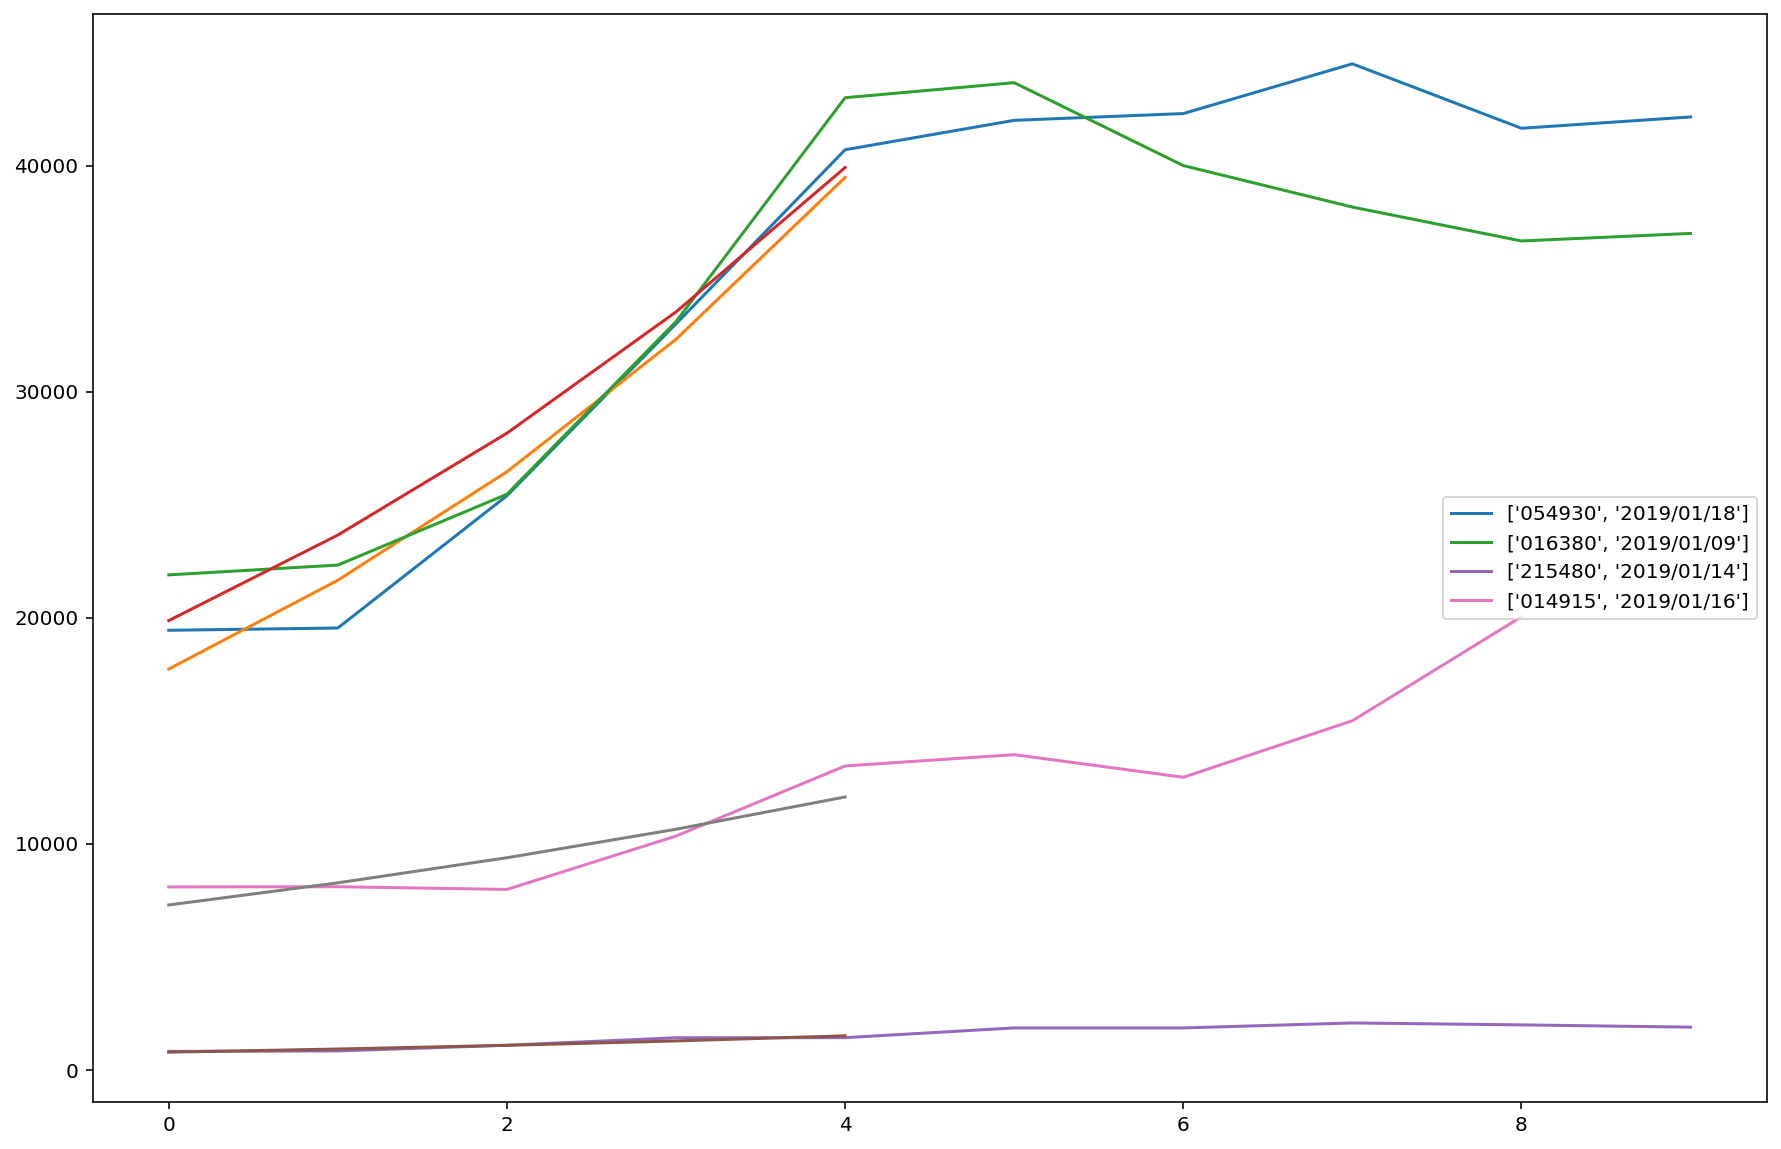

344.7525405883789


In [203]:
momentums = stocks.copy(deep = True)
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)

for code in codes:
    momentums[code] = stocks[code].rolling(5).apply(momentum)  # 5일이동평균

bests = momentums.max().sort_values(ascending = False).index[:5]

for best in bests:
    end = momentums[best].index.get_loc(momentums[best].idxmax())
    
    if end - 5 < 0:
        continue
        
    rets = np.log(stocks[best].iloc[end - 5: end])
    momentum_point = stocks[best].index[end].strftime('%Y/%m/%d')
    
    x = np.arange(len(rets))
    slope, intercept, r_value, p_value, std_err = linregress(x, rets)
    
    try:
        plt.plot(np.arange(10), stocks[best][end - 5:end + 5], label = [best, momentum_point])
        plt.plot(x, np.e ** (intercept + slope * x))
    except:
        continue
ax.legend(loc = 5)
plt.show()
end = time()
print(end - start)

In [197]:
df[df['STK_CD'] == '054930']

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,M5_PRC,M10_PRC,M20_PRC
549704,054930,유신,기타서비스,2019-01-02,18150.000,16400.000,18300.000,16550.000,60090.000,17730.000,18020.000,18667.500
549705,054930,유신,기타서비스,2019-01-03,16700.000,15600.000,17300.000,16550.000,74388.000,17310.000,17835.000,18535.000
549706,054930,유신,기타서비스,2019-01-04,16550.000,15800.000,16550.000,16200.000,32118.000,17020.000,17685.000,18330.000
549707,054930,유신,기타서비스,2019-01-07,16300.000,16200.000,16950.000,16900.000,45276.000,16850.000,17550.000,18157.500
549708,054930,유신,기타서비스,2019-01-08,16900.000,16650.000,19300.000,18050.000,192221.000,16850.000,17525.000,18107.500
...,...,...,...,...,...,...,...,...,...,...,...,...
550193,054930,유신,기타서비스,2020-12-23,13700.000,13550.000,13800.000,13750.000,8238.000,13970.000,14150.000,14157.500
550194,054930,유신,기타서비스,2020-12-24,13600.000,13550.000,13950.000,13900.000,8508.000,13910.000,14095.000,14155.000
550195,054930,유신,기타서비스,2020-12-28,13900.000,13750.000,14000.000,13950.000,5718.000,13860.000,14040.000,14152.500
550196,054930,유신,기타서비스,2020-12-29,14000.000,13950.000,14150.000,14100.000,9849.000,13900.000,14020.000,14167.500


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from collections import defaultdict
import warnings
import time
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'
from tqdm import tqdm

import alpaca_trade_api as tradeapi

api = tradeapi.REST('API KEY HERE',
                    'API SECRET CODE HERE', 
                    'https://paper-api.alpaca.markets')

from datetime import timedelta

matplotlib.rcParams['figure.figsize'] = (15, 10)

In [ ]:
def get_data(symbol, lookback):
    all_data = pd.DataFrame()
    for x in range(lookback):
        if x == 0:
            data = api.polygon.historic_agg('minute', 
                                            symbol, 
                                            limit=None).df
        else:
            data = api.polygon.historic_agg('minute', 
                                        symbol, 
                                        _from = (data.index.min() - timedelta(days=5)).strftime('%x %X'),
                                        to = start, 
                                        limit = None).df
        start = data.index.min().strftime('%x %X')
        all_data = pd.concat([data, all_data], axis=0)
    all_data.drop(columns=['volume'], inplace=True)
    all_data.replace(0, method='bfill', inplace=True)
    return all_data
        
def get_stock_data(stocklist, lookback):
    stock_data = {}
    for stock in tqdm(stocklist, desc='Getting stock data'):
        try:
            stock_data[stock] = get_data(stock, lookback)
        except Exception as e:
            print('Exception {} {}'.format(stock, e))
    return stock_data

def resample(stock_data, rate):
    for stock in stock_data:
        stock_data[stock] = stock_data[stock].resample(rate, closed='right', label='right').agg({'open': 'first',
                                                                                                 'high': 'max',
                                                                                                 'low': 'min',
                                                                                                 'close': 'last'}).dropna()
    return stock_data

def get_max_min(prices, smoothing, window_range):
    smooth_prices = prices['close'].rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmin())  
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    max_min = pd.concat([maxima, minima]).sort_index()
    max_min.index.name = 'date'
    max_min = max_min.reset_index()
    max_min = max_min[~max_min.date.duplicated()]
    p = prices.reset_index()   
    max_min['day_num'] = p[p['timestamp'].isin(max_min.date)].index.values
    max_min = max_min.set_index('day_num')['close']
    
    return max_min

def find_patterns(max_min):  
    patterns = defaultdict(list)
    
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        # Pattern must play out in less than n units
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]
                
        # IHS
        if a<b and c<a and c<e and c<d and e<d and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['IHS'].append((window.index[0], window.index[-1]))
        
    return patterns
    
def plot_minmax_patterns(prices, max_min, patterns, stock, window, ema):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    if len(patterns) == 0:
        pass
    else:
        num_pat = len([x for x in patterns.items()][0][1])
        f, axes = plt.subplots(1, 2, figsize=(16, 5))
        axes = axes.flatten()
        prices_ = prices.reset_index()['close']
        axes[0].plot(prices_)
        axes[0].scatter(max_min.index, max_min, s=100, alpha=.3, color='orange')
        axes[1].plot(prices_)
        for name, end_day_nums in patterns.items():
            for i, tup in enumerate(end_day_nums):
                sd = tup[0]
                ed = tup[1]
                axes[1].scatter(max_min.loc[sd:ed].index,
                              max_min.loc[sd:ed].values,
                              s=200, alpha=.3)
                plt.yticks([])
        plt.tight_layout()
        plt.title('{}: {}: EMA {}, Window {} ({} patterns)'.format(stock, incr, ema, window, num_pat))

def get_results(prices, max_min, pat, stock, ema_, window_):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    #fw_list = [1, 12, 24, 36] 
    fw_list = [1, 2, 3]
    results = []
    if len(pat.items()) > 0:
        end_dates = [v for k, v in pat.items()][0]      
        for date in end_dates:  
            param_res = {'stock': stock,
                         'increment': incr,
                         'ema': ema_,
                         'window': window_, 
                         'date': date}
            for x in fw_list:
                returns = (prices['close'].pct_change(x).shift(-x).reset_index(drop=True).dropna())
                try:
                    param_res['fw_ret_{}'.format(x)] = returns.loc[date[1]]   
                except Exception as e:
                    param_res['fw_ret_{}'.format(x)] = e
            results.append(param_res)  
    else:
        param_res = {'stock': stock,
                     'increment': incr,
                     'ema': ema_,
                     'window': window_,
                     'date': None}
        for x in fw_list:
            param_res['fw_ret_{}'.format(x)] = None   
        results.append(param_res)
    return pd.DataFrame(results)

def screener(stock_data, ema_list, window_list, plot, results):
    
    all_results = pd.DataFrame()
    
    for stock in stock_data:
        prices = stock_data[stock]
        
        for ema_ in ema_list:
            for window_ in window_list: 
                max_min = get_max_min(prices, smoothing=ema_, window_range=window_)
                pat = find_patterns(max_min)
                
                if plot == True:
                    plot_minmax_patterns(prices, max_min, pat, stock, window_, ema_)
                    
                if results == True:
                    all_results = pd.concat([all_results, get_results(prices, max_min, pat, stock, ema_, window_)], axis=0)
                
    if results == True:
        return all_results.reset_index(drop=True)

In [114]:
prices = df.copy()

In [ ]:
prices["DT"] = pd.to_datetime (prices["DT"])

In [115]:
prices['C_PRC'] = prices['C_PRC'].astype(int)

In [116]:
prices = prices.set_index('DT')

In [117]:
prices = prices.rename(columns = {'C_PRC' : 'close'})

In [118]:
prices.head()

,STK_CD,STK_NM,SEC_NM,O_PRC,L_PRC,H_PRC,close,VOL,M5_PRC,M10_PRC,M20_PRC
DT,,,,,,,,,,,
2019-01-02,000020,동화약품,제약바이오,9190.000,9080.000,9430.000,9340,88403.000,9008.000,9105.000,9297.000
2019-01-03,000020,동화약품,제약바이오,9340.000,9130.000,9390.000,9170,54992.000,9076.000,9072.000,9287.000
2019-01-04,000020,동화약품,제약바이오,9100.000,9100.000,9700.000,9530,115336.000,9236.000,9090.000,9293.500
2019-01-07,000020,동화약품,제약바이오,9660.000,9510.000,9800.000,9530,107912.000,9334.000,9125.000,9299.000
2019-01-08,000020,동화약품,제약바이오,9610.000,9320.000,9640.000,9520,108681.000,9418.000,9182.000,9303.500


In [187]:
stock_list = ['삼성전자', 'SK하이닉스', '셀트리온']

In [ ]:
criminal_patient_info = pd.DataFrame(columns= patient_info.columns)

for i in set(most_infected):
    for p_id in infected_patient[infected_patient['patient_id'] == i].index:
        criminal_patient_info = criminal_patient_info.append(patient_info[patient_info['patient_id'] == p_id])

In [171]:
prices_samsung = prices[prices['STK_NM'] == 'SK하이닉스']

In [172]:
prices_samsung

,STK_CD,STK_NM,SEC_NM,O_PRC,L_PRC,H_PRC,close,VOL,M5_PRC,M10_PRC,M20_PRC
DT,,,,,,,,,,,
2019-01-02,000660,SK하이닉스,반도체,61300.000,60000.000,61400.000,60600,1934295.000,60640.000,60540.000,63490.000
2019-01-03,000660,SK하이닉스,반도체,60200.000,57500.000,60300.000,57700,3337621.000,60100.000,60090.000,62850.000
2019-01-04,000660,SK하이닉스,반도체,57500.000,56700.000,58500.000,58300,3388087.000,59740.000,59810.000,62315.000
2019-01-07,000660,SK하이닉스,반도체,59000.000,58400.000,59700.000,58700,2273750.000,59160.000,59650.000,61840.000
2019-01-08,000660,SK하이닉스,반도체,57900.000,57600.000,60500.000,59200,3062192.000,58900.000,59710.000,61500.000
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,000660,SK하이닉스,반도체,113000.000,112500.000,116000.000,116000,3173156.000,116500.000,116650.000,112585.000
2020-12-24,000660,SK하이닉스,반도체,116000.000,115500.000,118500.000,118000,3486636.000,116200.000,116800.000,113515.000
2020-12-28,000660,SK하이닉스,반도체,119000.000,115000.000,119500.000,115500,4825132.000,115600.000,116800.000,114350.000


In [173]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from collections import defaultdict
import warnings
import time
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'
from tqdm import tqdm

In [174]:
def get_max_min(prices, smoothing, window_range):
    smooth_prices = prices['close'].rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmin())  
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    max_min = pd.concat([maxima, minima]).sort_index()
    max_min.index.name = 'date'
    max_min = max_min.reset_index()
    max_min = max_min[~max_min.date.duplicated()]
    p = prices.reset_index()   
    max_min['day_num'] = p[p['DT'].isin(max_min.date)].index.values
    max_min = max_min.set_index('day_num')['close']
    
    return max_min

In [175]:
smoothing = 3
window = 10

max_min = get_max_min(prices_samsung, smoothing, window)

In [176]:
min_max

day_num
14      66600
28      77400
38      70000
44      66600
46      66800
        ...  
467    100000
469     97200
472     97500
476    115000
479    120500
Name: close, Length: 91, dtype: int32

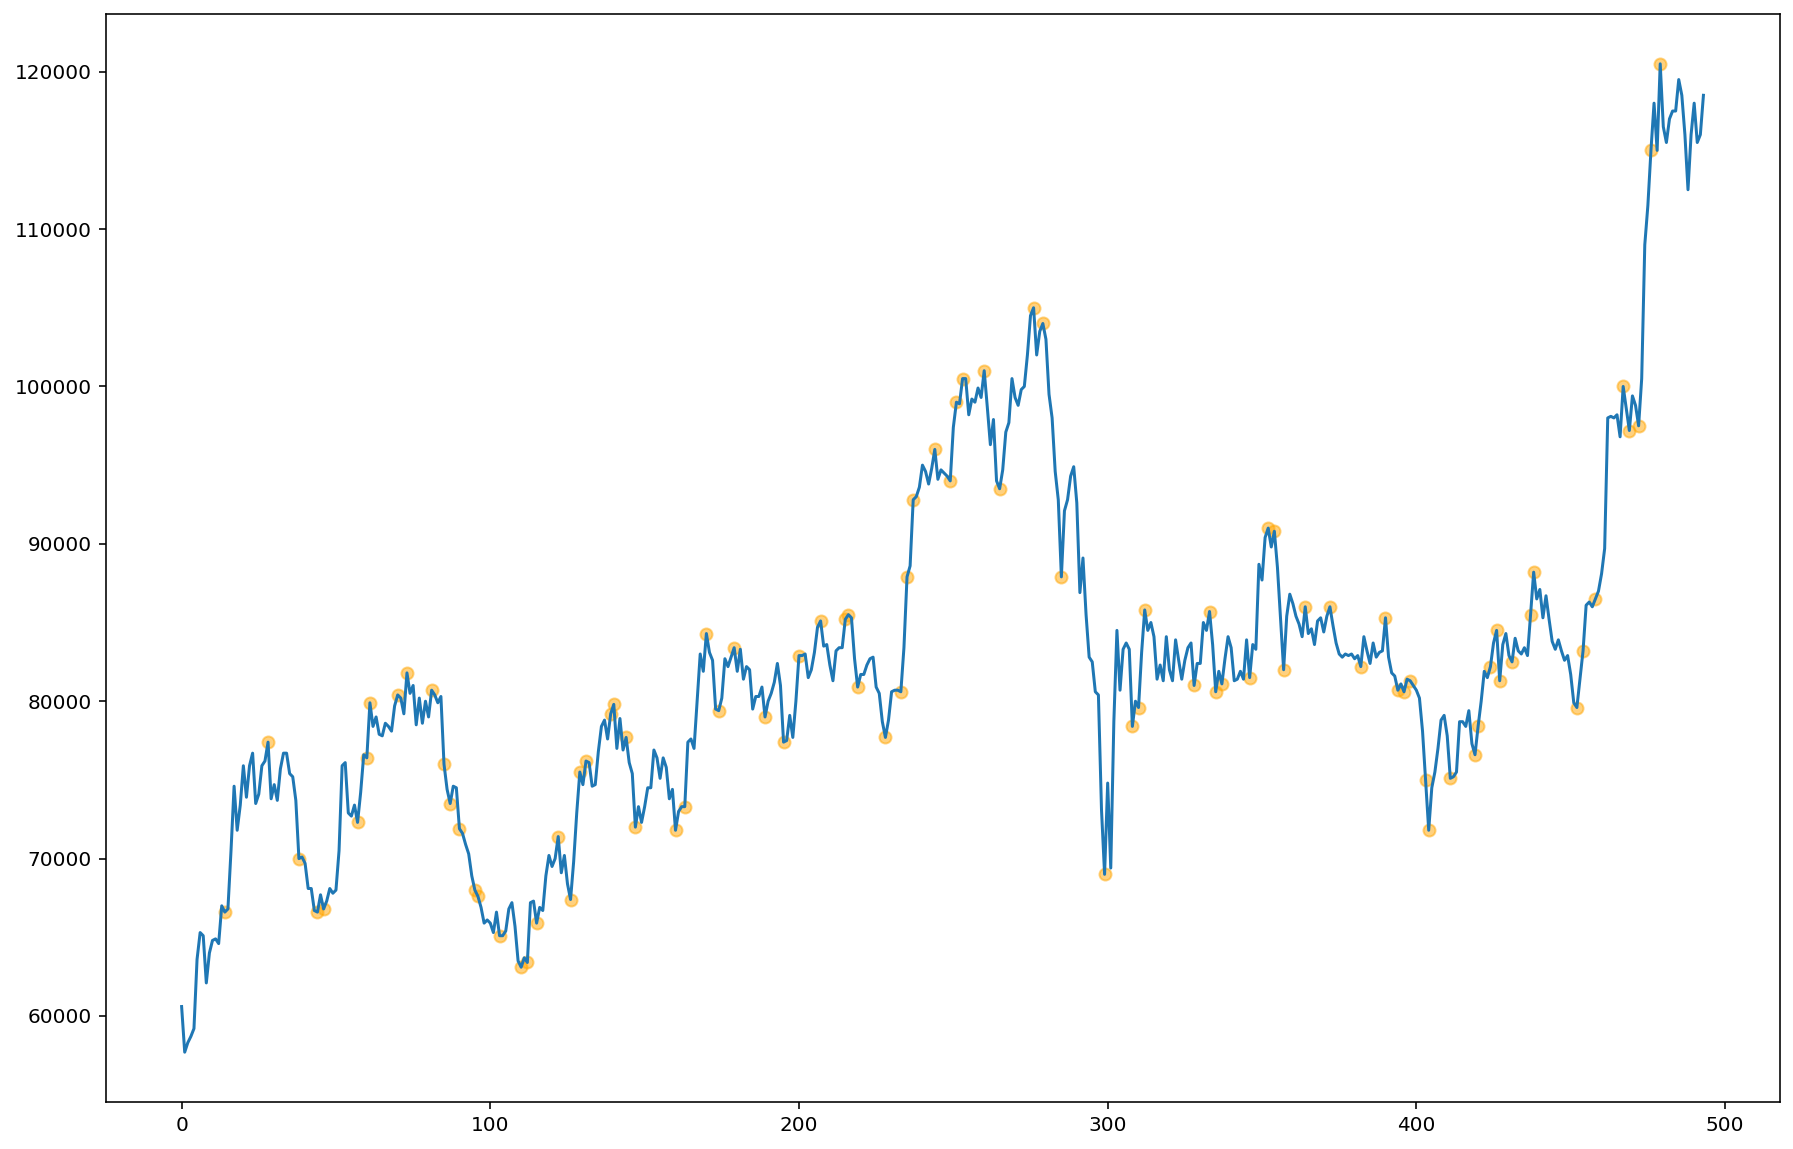

In [202]:
fig = plt.figure(figsize = (15,10))
prices_samsung.reset_index()['close'].plot()
plt.scatter(min_max.index, min_max.values, color ='orange', alpha = .5)

In [178]:
def find_patterns(max_min):  
    patterns = defaultdict(list)
    
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        # Pattern must play out in less than n units
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]

        # IHS
        if a<b and c<a and c<e and c<d and e<d and abs(b-d) <= np.mean([b,d]) * 0.02:
            patterns['IHS'].append((window.index[0], window.index[-1]))
        
    return patterns

In [179]:
patterns = find_patterns(min_max)

In [180]:
patterns.items()

dict_items([('IHS', [(253, 279)])])

In [181]:
def plot_minmax_patterns(prices, max_min, patterns, stock, window, ema):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    if len(patterns) == 0:
        pass
    else:
        num_pat = len([x for x in patterns.items()][0][1])
        f, axes = plt.subplots(1, 2, figsize=(16, 5))
        axes = axes.flatten()
        prices_ = prices.reset_index()['close']
        axes[0].plot(prices_)
        axes[0].scatter(max_min.index, max_min, s=100, alpha=.3, color='orange')
        axes[1].plot(prices_)
        for name, end_day_nums in patterns.items():
            for i, tup in enumerate(end_day_nums):
                sd = tup[0]
                ed = tup[1]
                axes[1].scatter(max_min.loc[sd:ed].index,
                              max_min.loc[sd:ed].values,
                              s=200, alpha=.3)
                plt.yticks([])
        plt.tight_layout()
        plt.title('{}: {}: EMA {}, Window {} ({} patterns)'.format(stock, incr, ema, window, num_pat))

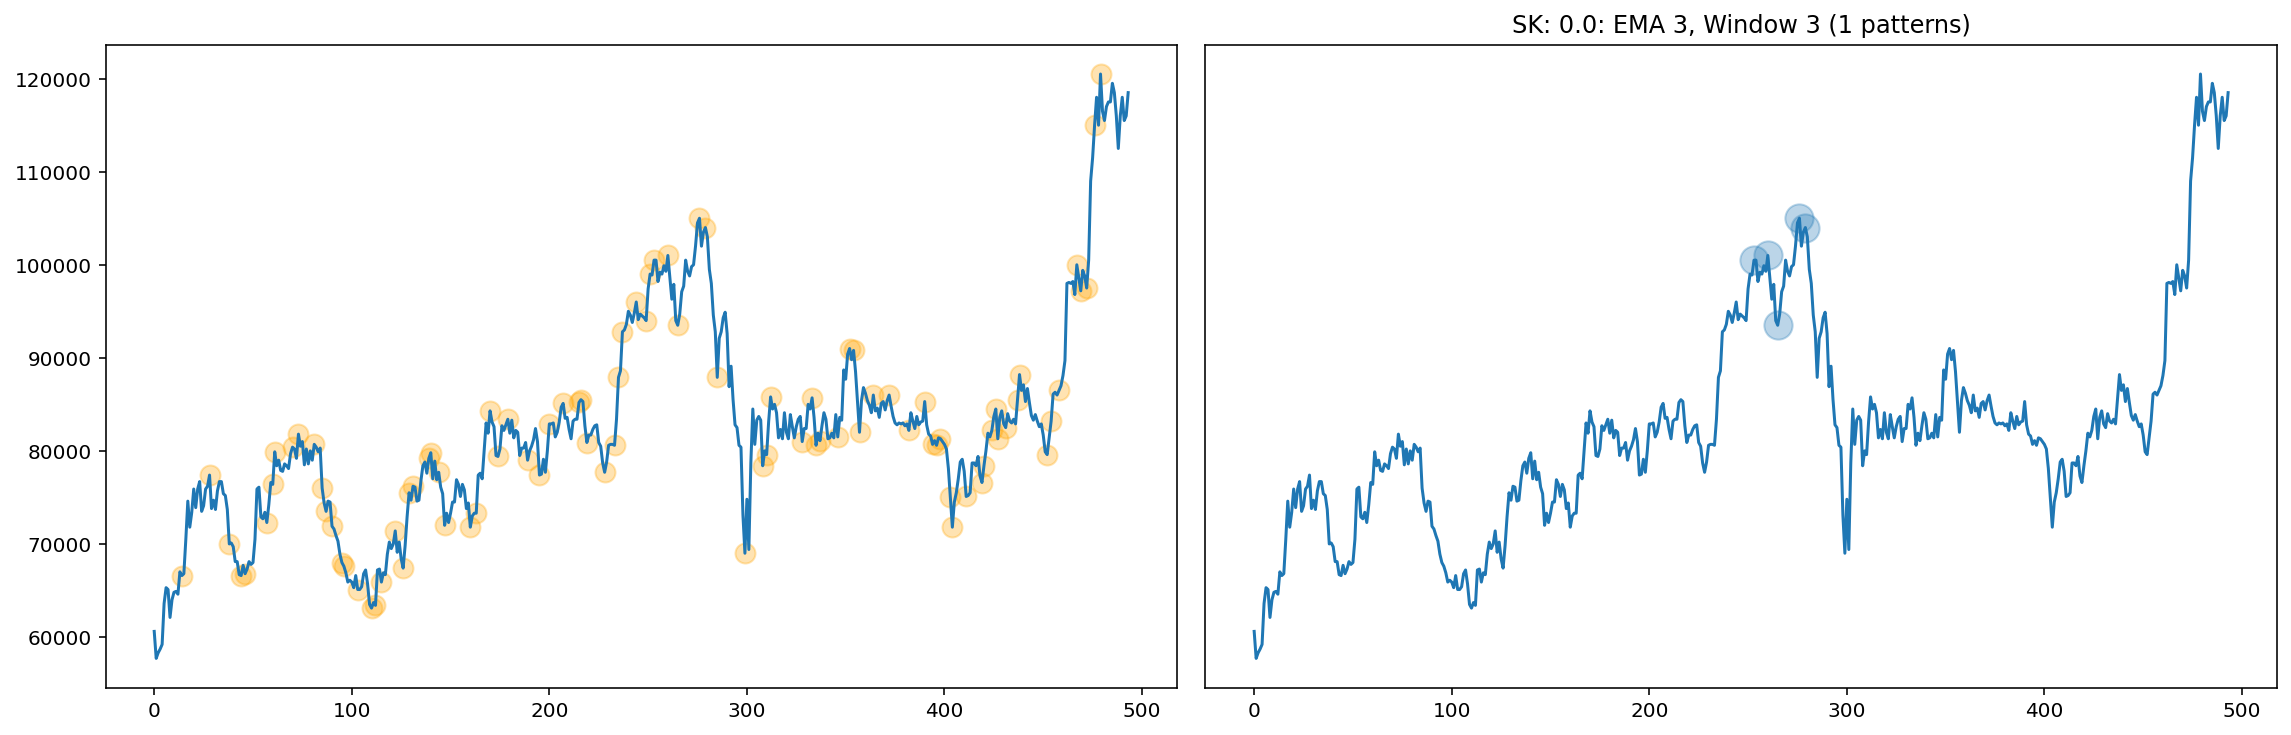

In [183]:
plot_minmax_patterns(prices_samsung, min_max, patterns, 'SK', 3, 3 )

In [184]:
def get_results(prices, max_min, pat, stock, ema_, window_):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    #fw_list = [1, 12, 24, 36] 
    fw_list = [1, 2, 3]
    results = []
    if len(pat.items()) > 0:
        end_dates = [v for k, v in pat.items()][0]      
        for date in end_dates:  
            param_res = {'stock': stock,
                         'increment': incr,
                         'ema': ema_,
                         'window': window_, 
                         'date': date}
            for x in fw_list:
                returns = (prices['close'].pct_change(x).shift(-x).reset_index(drop=True).dropna())
                try:
                    param_res['fw_ret_{}'.format(x)] = returns.loc[date[1]]   
                except Exception as e:
                    param_res['fw_ret_{}'.format(x)] = e
            results.append(param_res)  
    else:
        param_res = {'stock': stock,
                     'increment': incr,
                     'ema': ema_,
                     'window': window_,
                     'date': None}
        for x in fw_list:
            param_res['fw_ret_{}'.format(x)] = None   
        results.append(param_res)
    return pd.DataFrame(results)

In [185]:
get_results(prices_samsung, min_max, patterns, 'SK', 3, 3 )

,stock,increment,ema,window,date,fw_ret_1,fw_ret_2,fw_ret_3
0,SK,0.0,3,3,"(253, 279)",-0.009615,-0.043269,-0.057692


In [186]:
def screener(stock_data, ema_list, window_list, plot, results):
    
    all_results = pd.DataFrame()
    
    for stock in stock_data:
        prices = stock_data[stock]
        
        for ema_ in ema_list:
            for window_ in window_list: 
                max_min = get_max_min(prices, smoothing=ema_, window_range=window_)
                pat = find_patterns(max_min)
                
                if plot == True:
                    plot_minmax_patterns(prices, max_min, pat, stock, window_, ema_)
                    
                if results == True:
                    all_results = pd.concat([all_results, get_results(prices, max_min, pat, stock, ema_, window_)], axis=0)
                
    if results == True:
        return all_results.reset_index(drop=True)